In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
data=pd.read_csv('delivery_time.csv')

In [22]:
data


,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [23]:
data.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


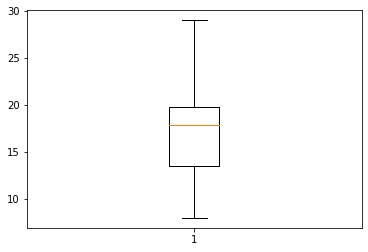

In [24]:
plt.boxplot(data.DeliveryTime)
data.describe()

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

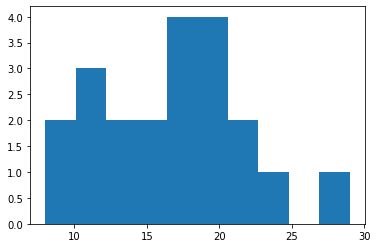

In [25]:
plt.hist(data.DeliveryTime)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1d677ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1d679d5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1d67b3b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1d679dc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1d679dfd0>],
 'means': []}

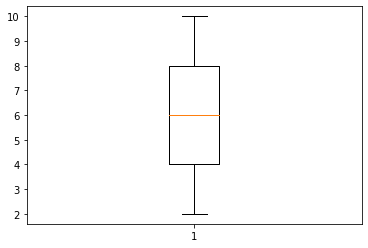

In [26]:
plt.boxplot(data.SortingTime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

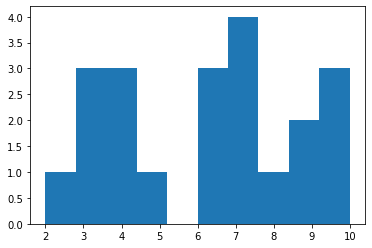

In [27]:
plt.hist(data.SortingTime)

Text(0, 0.5, 'SortingTime')

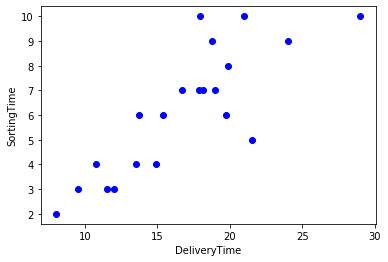

In [28]:
plt.plot(data.DeliveryTime,data.SortingTime,"bo")
plt.xlabel("DeliveryTime")
plt.ylabel("SortingTime")


In [29]:
data.SortingTime.corr(data.DeliveryTime)

0.8259972607955325

In [30]:
import statsmodels.formula.api as smf
model=smf.ols("SortingTime~DeliveryTime",data=data).fit()
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        15:12:43   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.resid
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [33]:
print(model.conf_int(0.05))

                     0         1
Intercept    -3.130058  1.616712
DeliveryTime  0.278169  0.549318


In [34]:
pred = model.predict(data.iloc[:,0])
pred
pd.set_option("display.max_rows", None) 
pred
rmse_lin = np.sqrt(np.mean((np.array(data['SortingTime'])-np.array(pred))**2))
rmse_lin 


1.3983430567957227

Text(0, 0.5, 'SortingTime')

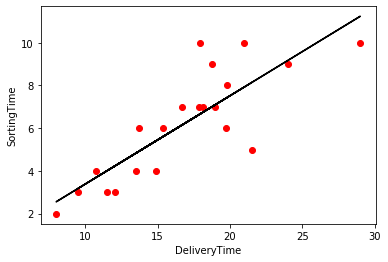

In [35]:
import matplotlib.pylab as plt
plt.scatter(x=data['DeliveryTime'],y=data['SortingTime'],color='red')
plt.plot(data['DeliveryTime'],pred,color='black')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [36]:
model2 = smf.ols ('SortingTime~np.log(DeliveryTime)',data=data).fit()
model2.params
model2.resid
model2.resid_pearson

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        15:12:46   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred2= model2.predict(pd.DataFrame(data['DeliveryTime']))
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [39]:
rmse_log=np.sqrt(np.mean((np.array(data['SortingTime'])-np.array(pred2))**2))
rmse_log

1.3337477286899515

In [40]:
pred2.corr(data.SortingTime)

0.8431772637224146

Text(0, 0.5, 'SortingTime')

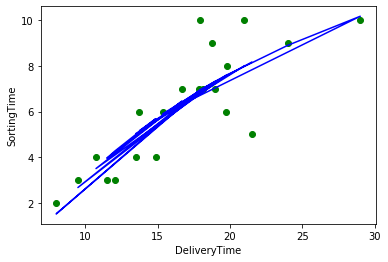

In [41]:
plt.scatter(x=data['DeliveryTime'],y=data['SortingTime'], color='green')
plt.plot(data['DeliveryTime'],pred2, color='blue')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        15:12:48   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3= smf.ols('np.log(SortingTime)~DeliveryTime', data=data).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Thu, 18 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                         15:12:48   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred_log= model3.predict(pd.DataFrame(data['DeliveryTime']))

In [45]:
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [46]:
pred3=np.exp(pred_log)
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [47]:
rmse_exp=np.sqrt(np.mean((np.array(data['SortingTime'])-np.array(pred3))**2))
rmse_exp

1.7921450016869793

In [48]:
pred3.corr(data['SortingTime'])

0.7472768828616799

Text(0, 0.5, 'SortingTime')

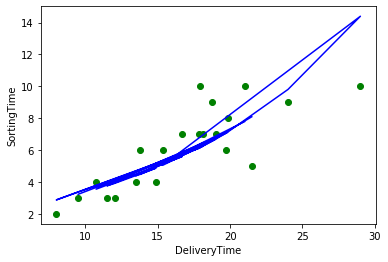

In [49]:
plt.scatter(x=data['DeliveryTime'],y=data['SortingTime'], color='green')
plt.plot(data.DeliveryTime,pred3,color='blue')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')


In [50]:
model.resid=model3.resid_pearson
model.resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standerdized Residual')

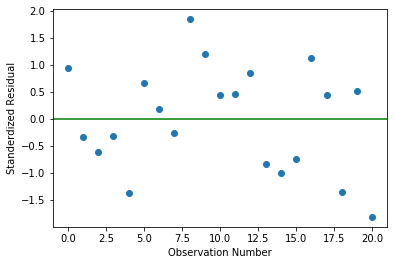

In [51]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel('Observation Number')
plt.ylabel('Standerdized Residual')


Text(0, 0.5, 'Actual')

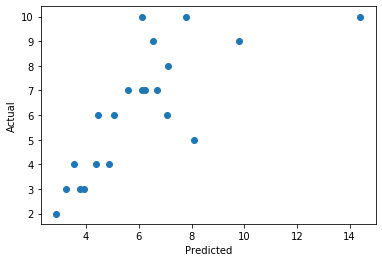

In [52]:
plt.scatter(x=pred3,y=data.SortingTime)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [53]:
data['DeliveryTime_Sq']=data.DeliveryTime*data.DeliveryTime
data

,DeliveryTime,SortingTime,DeliveryTime_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [54]:
model_quad= smf.ols("np.log(SortingTime)~DeliveryTime+DeliveryTime_Sq",data=data).fit()
model_quad.params

Intercept         -0.778048
DeliveryTime       0.227222
DeliveryTime_Sq   -0.004271
dtype: float64

model_quad.summary()

In [55]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.771
Method:                  Least Squares   F-statistic:                     34.62
Date:                 Thu, 18 Mar 2021   Prob (F-statistic):           6.77e-07
Time:                         15:12:54   Log-Likelihood:                 3.2337
No. Observations:                   21   AIC:                           -0.4673
Df Residuals:                       18   BIC:                             2.666
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7780      0.450     -1.730      0.101      -1.723       0.167
DeliveryTime        0.2272      0.052      4.346      0.000       0.117       0.337
DeliveryTime_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
pred_quad=model_quad.predict(data)
pred4=np.exp(pred_quad)
pred4

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [57]:
rmse_quad=np.sqrt(np.mean((np.array(data['SortingTime'])-np.array(pred4))**2))
rmse_quad

1.347141980025572

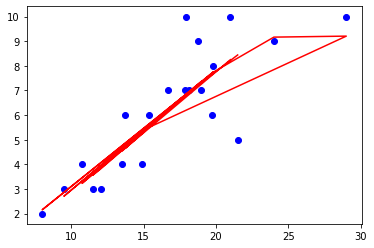

In [58]:
plt.scatter(data.DeliveryTime,data.SortingTime,c='b')
plt.plot(data.DeliveryTime,pred4,'r')

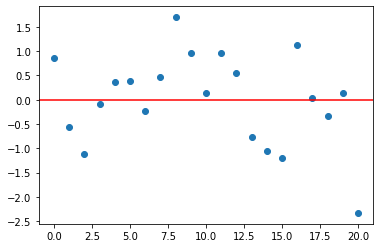

In [59]:
plt.scatter(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0, color='red')
pltxlabel=('Observation Number')
pltylabel=('Standerdized Residual')

In [60]:
data1={'MODEL':pd.Series(['rmse_lin','rmse_log','rmse_exp','rmse_quad']),
     'RMSE_Values':pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
     'Rsquare':pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data1)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,1.398343,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_exp,1.792145,0.695443
3,rmse_quad,1.347142,0.793693


In [61]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [62]:
plt.style.use('dark_background')

(array([1., 0., 1., 3., 2., 3., 5., 2., 3., 1.]),
 array([-2.33754663, -1.93344817, -1.52934971, -1.12525125, -0.72115278,
        -0.31705432,  0.08704414,  0.4911426 ,  0.89524106,  1.29933953,
         1.70343799]),
 <a list of 10 Patch objects>)

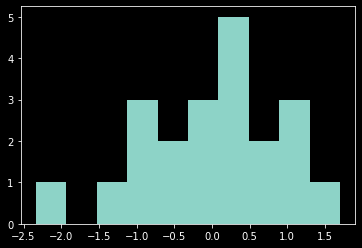

In [63]:
plt.hist(model_quad.resid_pearson)

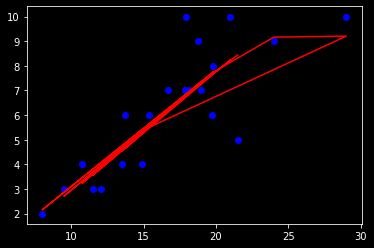

In [64]:
plt.scatter(data.DeliveryTime,data.SortingTime,c="b")
plt.plot(data.DeliveryTime,pred4,"r") 

